# Analysis House Data

In [1]:
# Import the required libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import numpy as np

In [2]:
#Import house Data
#encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'cp1252', 'utf-16']

file_path = "Cleaned_Data/house_clean_final.csv"
house_df = pd.read_csv(file_path, encoding="utf-8")

house_df


,POST_CODE,MUNICIPALITY,CITY_SHIRE,SUBURB_GROUP,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,3101,Eastern municipalities and their suburbs,City of Boroondara,Mid,1500000.0,1751000.0,1950000.0,2080000.0,2207500.0,2317500.0,2380000.0,2310000.0,2.251500e+06,2775000.0,2.850000e+06
1,3102,Eastern municipalities and their suburbs,City of Boroondara,Mid,1000250.0,1235000.0,1307500.0,1632500.0,1741250.0,1878000.0,1783750.0,1835000.0,1.812500e+06,2038000.0,2.147500e+06
2,3103,Eastern municipalities and their suburbs,City of Boroondara,Mid,1585000.0,1755500.0,1997500.0,2480000.0,2390000.0,2601250.0,2556250.0,2617750.0,2.705000e+06,3000000.0,2.925750e+06
3,3104,Eastern municipalities and their suburbs,City of Boroondara,Mid,997500.0,1240000.0,1452000.0,1850000.0,1800000.0,1950000.0,1810000.0,1720000.0,1.900000e+06,2252500.0,2.230000e+06
4,3122,Eastern municipalities and their suburbs,City of Boroondara,Mid,1405000.0,1575000.0,1606500.0,1916500.0,2245000.0,2650000.0,2506500.0,2200000.0,2.512500e+06,2915000.0,2.475000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,3338,Western municipalities and their suburbs,City of Melton,Outer,385100.0,347100.0,361700.0,363700.0,387600.0,449400.0,511700.0,492000.0,5.270000e+05,577800.0,6.210000e+05
189,3427,Western municipalities and their suburbs,City of Melton,Outer,279000.0,280000.0,325000.0,325000.0,360000.0,440500.0,500000.0,515000.0,5.600000e+05,614000.0,6.505000e+05
190,3024,Western municipalities and their suburbs,City of Wyndham,Outer,315750.0,314250.0,333000.0,355000.0,391250.0,462750.0,500000.0,496750.0,4.598333e+05,574500.0,6.198333e+05
191,3029,Western municipalities and their suburbs,City of Wyndham,Outer,354250.0,345000.0,378250.0,386375.0,427000.0,497625.0,540500.0,529125.0,5.488750e+05,583375.0,6.266250e+05


In [5]:
# Select the columns for 2012 to 2022
columns_2012_to_2022 = house_df.columns[house_df.columns.str.contains('20[12-9]|202[0-2]')]

# Group the DataFrame by 'SUBURB_GROUP' and calculate the average of the selected columns
grouped_df = house_df.groupby('SUBURB_GROUP')[columns_2012_to_2022].mean()

# Display the grouped DataFrame
grouped_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
SUBURB_GROUP,,,,,,,,,,,
Inner,940534.313725,1.003814e+06,1.135559e+06,1.233495e+06,1.424912e+06,1.600824e+06,1.580245e+06,1.474319e+06,1.564147e+06,1.782034e+06,1.743054e+06
Mid,744534.645062,8.037279e+05,8.928953e+05,1.046301e+06,1.155321e+06,1.289098e+06,1.248485e+06,1.196116e+06,1.286821e+06,1.497526e+06,1.485210e+06
Outer,403998.815359,4.140089e+05,4.392143e+05,4.785707e+05,5.294634e+05,6.241751e+05,6.615190e+05,6.369105e+05,6.777743e+05,7.947913e+05,8.436191e+05


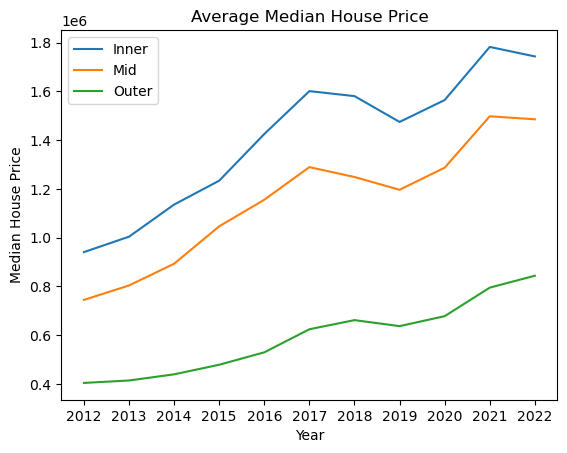

In [6]:
# Iterate over the groups in the grouped DataFrame
for suburb_group, data in grouped_df.iterrows():
    # Plot a line chart for each suburb group
    plt.plot(data.index, data.values, label=suburb_group)

# Set the title and labels
plt.title('Average Median House Price')
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.legend()

# Display the plot
plt.show()